In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
from PIL import Image

# Mount Google Drive
drive.mount('/content/drive')

# Open the image
for i in range (1,380): # Quebradas tem 379 imagens e inteiras 329, cropped_image1~330 inteiras, cropped_image331~709 quebradas, mirrored_image1~330 inteiras, mirrored_image331~709 quebradas
    if (f"imagem{i}.png" == True):
      image = Image.open(f"imagem{i}.png")
    else:
      i+=1


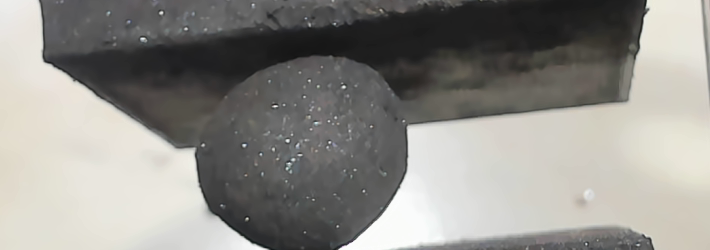

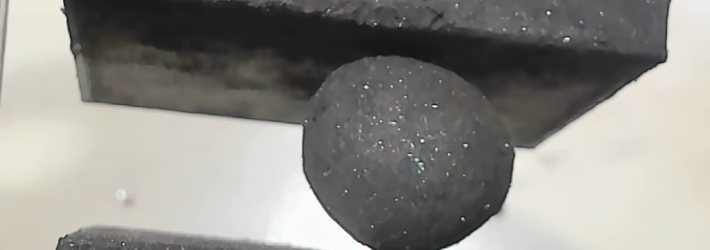

In [ ]:
#TESTANDO A INVERSÃO DE IMAGEM

from PIL import Image
import IPython.display as display

# Replace 'path/to/your/image.jpg' with the actual path to the image in your Google Drive
image_path = '/content/drive/MyDrive/imagens_e_labels/cropped_image1.png'
image = Image.open(image_path)
mirrored_image = image.transpose(Image.FLIP_LEFT_RIGHT)

# Show the original and mirrored image
display.display(image)
display.display(mirrored_image)


In [ ]:
#fazendo um foor e salvando as imagens invertidas

from PIL import Image


for i in range(331,709):
  image_path = f'/content/drive/MyDrive/imagens_e_labels/cropped_image{i}.png'
  image = Image.open(image_path)
  mirrored_image = image.transpose(Image.FLIP_LEFT_RIGHT)
 # Define the path to save the mirrored image
  save_path = f"/content/drive/MyDrive/imagens_e_labels/mirrored_image{i}.png"
  # Save the cropped image to the specified path
  mirrored_image.save(save_path)

In [ ]:
# VERIFICAR QUANTAS IMAGENS TEM NO DIRETÓRIO

import os

# Define the path to the directory
dir_path = "/content/drive/MyDrive/imagens_e_labels"

# Get the list of files in the directory
file_list = os.listdir(dir_path)

# Count the number of PNG image files in the directory
num_images = sum(1 for f in file_list if f.endswith('.png'))

print(f"Number of PNG image files in {dir_path}: {num_images}")


Number of PNG image files in /content/drive/MyDrive/imagens_e_labels: 1416


In [ ]:
# apaga todos os txts ou pngs
import os

# Define the path to the directory
dir_path = "/content/drive/MyDrive/imagens_e_labels_2"

# Loop through the files in the directory
for filename in os.listdir(dir_path):
    # Check if the file name matches the pattern "imageX.txt"
    if filename.startswith("image") and filename.endswith(".txt"):
        # Define the path to the file
        file_path = os.path.join(dir_path, filename)

        # Delete the file
        os.remove(file_path)


In [ ]:
# criando os labels
import os

directory = '/content/drive/MyDrive/imagens_e_labels'

if not os.path.exists(directory):
    os.makedirs(directory)

for i in range(1, 331):
    file_name = f'{directory}/mirrored_image{i}.txt'
    with open(file_name, 'w') as f:
        f.write('0')


In [ ]:
#criando uma pasta só com todas imagens e labels

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/imagens_e_labels
!cp -r * /content/drive/MyDrive/imagens_e_labels_2



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/imagens_e_labels


In [ ]:
#carregando os dados e criando os treinos e testes splits

from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/imagens_e_labels"

import numpy as np
import pandas as pd
import os
import cv2
from sklearn.model_selection import train_test_split

#Load the data:
image_files = sorted([f for f in os.listdir('.') if f.endswith('.png')])
label_files = sorted([f for f in os.listdir('.') if f.endswith('.txt')])

#Combine the image and label files into a single pandas DataFrame:
data = pd.DataFrame({'image_file': image_files, 'label_file': label_files})

#Create training and testing splits
train, test = train_test_split(data, test_size=0.2, random_state=42)

#Load and preprocess the images and labels:
def load_image(filename):
    # Load image file
    img = cv2.imread(filename)
    # Aplica o filtro "Heat Map" usando a função applyColorMap do OpenCV
    #gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #heat_map = cv2.applyColorMap(gray, cv2.COLORMAP_HOT)
    # Preprocess image as needed (e.g., normalize pixel values)
    img = img.astype('float32') / 255.0 # Normalize pixel values between 0 and 1
    # Return preprocessed image as numpy array
    return img

def load_label(filename):
    # Load label file
    with open(filename, 'r') as f:
        label = f.read().strip()
    # Preprocess label as needed (e.g., convert to one-hot encoding)
    if label == "1":
        label = 1
    else:
        label = 0
    # Return preprocessed label as numpy array
    return label

#Train and test your neural network using X_train, y_train, X_test, and y_test.
X_train = np.array([load_image(f) for f in train['image_file']])
y_train = np.array([load_label(f) for f in train['label_file']])

X_test = np.array([load_image(f) for f in test['image_file']])
y_test = np.array([load_label(f) for f in test['label_file']])

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/imagens_e_labels


In [ ]:
y_val

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [ ]:
#keras.layers.Conv2D(filters=32, kernel_size=3, strides = (1,1), activation='relu', input_shape=(250, 710, 3)),
#keras.layers.AveragePooling2D(pool_size=(2,2), strides=None, padding='valid', data_format=None),

'cropped_image109.png'

In [ ]:
#rascunho de modelo

    keras.layers.Conv2D(filters=64, kernel_size=7, strides=(2, 3), activation='relu', input_shape=(250, 710, 3)),
    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None),
    keras.layers.Conv2D(filters=192, kernel_size=3, strides=(1, 2), activation='relu'),
    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None),
    keras.layers.Conv2D(filters=128, kernel_size=1, strides=(1, 1), activation='relu'),
    keras.layers.Conv2D(filters=256, kernel_size=3, strides=(1, 1), activation='relu'),
    keras.layers.Conv2D(filters=256, kernel_size=1, strides=(1, 1), activation='relu'),
    keras.layers.Conv2D(filters=512, kernel_size=3, strides=(1, 1), activation='relu'),

    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None), #(12,12,512)

    keras.layers.Conv2D(filters=256, kernel_size=1, strides=(1, 1), activation='relu'),
    keras.layers.Conv2D(filters=512, kernel_size=3, strides=(1, 1), activation='relu'),
    keras.layers.Conv2D(filters=256, kernel_size=1, strides=(1, 1), activation='relu'),
    keras.layers.Conv2D(filters=512, kernel_size=3, strides=(1, 1), activation='relu'),
    keras.layers.Conv2D(filters=512, kernel_size=1, strides=(1, 1), activation='relu'),
    keras.layers.Conv2D(filters=1024, kernel_size=3, strides=(1, 1), activation='relu'), #(6,6,1024)

    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None),#(4,4,1024)

    keras.layers.Conv2D(filters=512, kernel_size=1, strides=(1, 1), activation='relu'),
    keras.layers.Conv2D(filters=1024, kernel_size=3, strides=(1, 1), activation='relu'), #(1,1,1024)

In [ ]:
#1 modelo

model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=5, strides=(1, 2), activation='relu', input_shape=(250, 710, 3)),# results in a matrice (246, 353, 32)
    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None),            # results in a matrice (123, 176, 32)
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 1), activation='relu'),                           # results in a matrice (121, 174, 32)
    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None),            # results in a matrice (60, 87, 32)
    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), activation='relu'),                           # results in a matrice (58, 85, 64)
    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None),            # results in a matrice (29, 42, 64)
    keras.layers.Conv2D(filters=128, kernel_size=3, strides=(1, 1), activation='relu'),                          # results in a matrice (27, 40, 128)




    keras.layers.Flatten(),#(138.240,)
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(rate=0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Dense(1, activation='sigmoid')
])

Test accuracy: 0.9718309640884399
# testado e boa arquitetura

In [ ]:
#2 modelo

model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 2), activation='relu', input_shape=(250, 710, 3)),# results in a matrice (248, 354, 32)
    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None), # results in a matrice (124, 177, 32)

    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), activation='relu'), # results in a matrice (122, 175, 64)
    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None), # results in a matrice (61, 87, 64)

    keras.layers.Conv2D(filters=128, kernel_size=3, strides=(1, 2), activation='relu'), # results in a matrice (59, 43, 128)
    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None), # results in a matrice (29, 21, 128)

    keras.layers.Conv2D(filters=256, kernel_size=3, strides=(1, 1), activation='relu'), # results in a matrice (27, 19, 256)
    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None), # results in a matrice (13, 9, 256)

    keras.layers.Flatten(), # results in a vector of shape (29952,)

    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Dense(1, activation='sigmoid')
])

Test accuracy: 0.9753521084785461
# testado e boa arquitetura

In [ ]:
#modelo da rede neural

from tensorflow import keras

from tensorflow.keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Add the early stopping callback to the list of callbacks
callbacks_list = [early_stopping]

from tensorflow.keras import regularizers

# Add L1 and L2 regularization to the Dense layers
l1_l2_regularizer = regularizers.l1_l2(l1=1e-4, l2=1e-4) # Adjust the values as needed

# Define the architecture of the neural network
model = keras.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, strides=(1, 2), activation='relu', input_shape=(250, 710, 3)),# results in a matrice (248, 354, 32)
    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None), # results in a matrice (124, 177, 32)

    keras.layers.Conv2D(filters=64, kernel_size=3, strides=(1, 1), activation='relu'), # results in a matrice (122, 175, 64)
    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None), # results in a matrice (61, 87, 64)

    keras.layers.Conv2D(filters=128, kernel_size=3, strides=(1, 2), activation='relu'), # results in a matrice (59, 43, 128)
    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None), # results in a matrice (29, 21, 128)

    keras.layers.Conv2D(filters=256, kernel_size=3, strides=(1, 1), activation='relu'), # results in a matrice (27, 19, 256)
    keras.layers.AveragePooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None), # results in a matrice (13, 9, 256)

    keras.layers.Flatten(), # results in a vector of shape (29952,)


    keras.layers.Dense(64, activation='relu', kernel_regularizer=l1_l2_regularizer),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Dense(32, activation='relu', kernel_regularizer=l1_l2_regularizer),
    keras.layers.Dropout(rate=0.25),
    keras.layers.Dense(1, activation='sigmoid')
])


# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, batch_size=16, epochs=15, validation_data=(X_val, y_val), callbacks=callbacks_list)


# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

model.summary()

Epoch 1/15
54/54 [==============================] - 198s 4s/step - loss: 1.0675 - accuracy: 0.6148 - val_loss: 0.8175 - val_accuracy: 0.5265
Epoch 2/15
54/54 [==============================] - 194s 4s/step - loss: 0.5476 - accuracy: 0.8351 - val_loss: 0.3831 - val_accuracy: 0.9223
Epoch 3/15
54/54 [==============================] - 194s 4s/step - loss: 0.3760 - accuracy: 0.9317 - val_loss: 0.3867 - val_accuracy: 0.9187
Epoch 4/15
54/54 [==============================] - 194s 4s/step - loss: 0.3030 - accuracy: 0.9482 - val_loss: 0.3375 - val_accuracy: 0.9223
Epoch 5/15
54/54 [==============================] - 194s 4s/step - loss: 0.2821 - accuracy: 0.9564 - val_loss: 0.2731 - val_accuracy: 0.9541
Epoch 6/15
54/54 [==============================] - 193s 4s/step - loss: 0.2464 - accuracy: 0.9682 - val_loss: 0.2596 - val_accuracy: 0.9505
Epoch 7/15
54/54 [==============================] - 193s 4s/step - loss: 0.2185 - accuracy: 0.9694 - val_loss: 0.2308 - val_accuracy: 0.9682
Epoch 8/15
54

In [ ]:
#visualizando os resultados obtidos em algumas métricas

from sklearn.metrics import classification_report

# Predict on the test set
y_pred = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = (y_pred > 0.5).astype(int)

# Calculate classification report
print(classification_report(y_test, y_pred))


5/5 [==============================] - 6s 1s/step
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        76
           1       0.97      0.91      0.94        66

    accuracy                           0.94       142
   macro avg       0.95      0.94      0.94       142
weighted avg       0.94      0.94      0.94       142



In [ ]:
#pritando a matrix confusão do modelo

from sklearn.metrics import confusion_matrix

# Use the trained model to predict on the test set
y_pred = model.predict(X_test)

# Convert the predicted probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

print(cm)


5/5 [==============================] - 9s 2s/step
[[71  5]
 [ 0 66]]


1/1 [==============================] - 0s 158ms/step


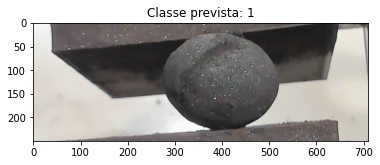

array([[0.9697913]], dtype=float32)

In [ ]:
# FAZENDO TESTES COM MEU SET DE VALIDAÇÃO(se está bom para exemplos fora do treinamento)

from tensorflow import keras
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Carregue a imagem usando a biblioteca Pillow
image = Image.open("/content/c_img9.png")

# Converta a imagem para um array numpy e normalize os valores dos pixels
image_array = np.array(image) / 255.0

# Adicione uma dimensão adicional para representar o batch_size
image_array = np.expand_dims(image_array, axis=0)

# Faça uma previsão na imagem
prediction = model.predict(image_array)

# Converta as probabilidades em uma classe (0 ou 1)
predicted_class = int(round(prediction[0][0]))

# Imprima a imagem e a previsão feita pelo modelo
plt.imshow(image)
plt.title("Classe prevista: {}".format(predicted_class))
plt.show()

prediction
